<a href="https://colab.research.google.com/github/nitinranjansharma/EVA5B2/blob/main/s8/s8_workflow_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
## importing and transforming data
from read_inputs import read_transform_inputs
trainset, trainloader, testset, testloader, classes = read_transform_inputs()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


  dog   cat  deer plane


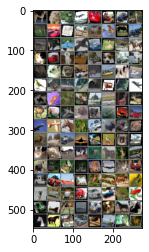

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
## defining model

from define_model import ResNet
from define_model import BasicBlock
from define_model import Bottleneck
!pip install torchsummary
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = ResNet(BasicBlock, [2, 2, 2, 2]).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [ ]:
##defining optimiser
from define_optim import optim_define
optimizer = optim_define(model)

In [ ]:
## defining accuracy check and defining the training class
from truth_checker import truth_checker
from training_class import training_class
clf = training_class(model=model,trainloader = trainloader,testloader= testloader,device=device,
                     epoch=30,optimizer=optimizer)

In [ ]:
clf.fit()

epoch [0] train accuracy 0.467 : test accuracy 0.471
epoch [1] train accuracy 0.566 : test accuracy 0.562
epoch [2] train accuracy 0.644 : test accuracy 0.633
epoch [3] train accuracy 0.694 : test accuracy 0.680
epoch [4] train accuracy 0.752 : test accuracy 0.738
epoch [5] train accuracy 0.782 : test accuracy 0.759
epoch [6] train accuracy 0.804 : test accuracy 0.776
epoch [7] train accuracy 0.831 : test accuracy 0.798
epoch [8] train accuracy 0.840 : test accuracy 0.802
epoch [9] train accuracy 0.854 : test accuracy 0.813
epoch [10] train accuracy 0.864 : test accuracy 0.824
epoch [11] train accuracy 0.872 : test accuracy 0.825
epoch [12] train accuracy 0.884 : test accuracy 0.832
epoch [13] train accuracy 0.893 : test accuracy 0.839
epoch [14] train accuracy 0.898 : test accuracy 0.840
epoch [15] train accuracy 0.908 : test accuracy 0.845
epoch [16] train accuracy 0.916 : test accuracy 0.849
epoch [17] train accuracy 0.915 : test accuracy 0.844
epoch [18] train accuracy 0.926 : test

In [ ]:
### training process initiation
#from train_iteration import train
#criterion = nn.CrossEntropyLoss()
#train(50,trainloader,device,optimizer,model,criterion)

GroundTruth:    cat  ship  ship plane


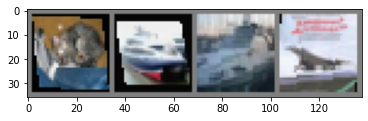

In [ ]:
## checking test images

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
from accuracy_check import check_accuracy     
check_accuracy(testloader,device,model)

Accuracy of the network on the 10000 test images: 86 %


86.37